<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Romania-Data" data-toc-modified-id="Romania-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Romania Data</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Fit-Model,-Make-Predictions" data-toc-modified-id="Fit-Model,-Make-Predictions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit Model, Make Predictions</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Commentary</a></span><ul class="toc-item"><li><span><a href="#14th-April" data-toc-modified-id="14th-April-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>14th April</a></span></li></ul></li></ul></div>

## Romania Data
## Load data

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Load data
country = 'Romania'
filepath = '../data/raw/'
fix_data = {}

ro = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

ro.load()

## Fit Model, Make Predictions

In [2]:
ro.fit(curve='gamma')
ro_df = ro.predict()
ro.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
ro_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-05-14,245.0,111.678275
2020-05-15,190.0,103.645618
2020-05-16,NaN,96.058749
2020-05-17,NaN,88.909294
2020-05-18,NaN,82.186781


## Display Actual vs Prediction

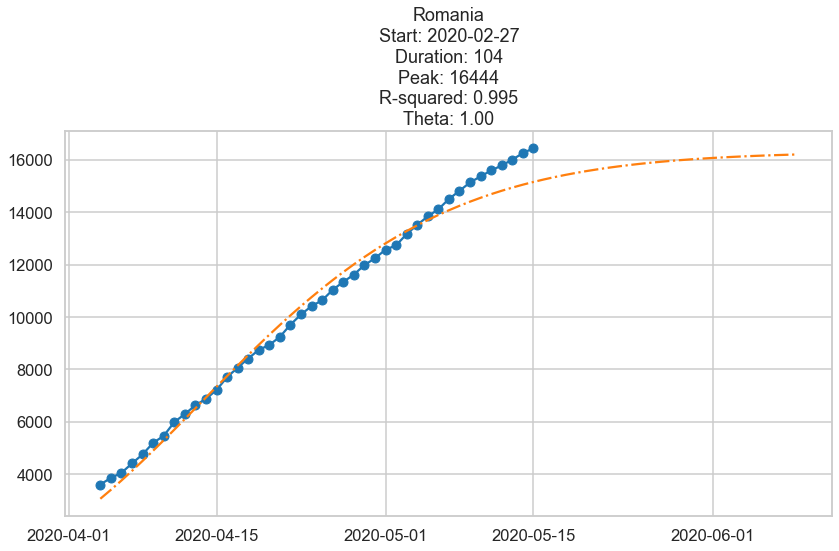

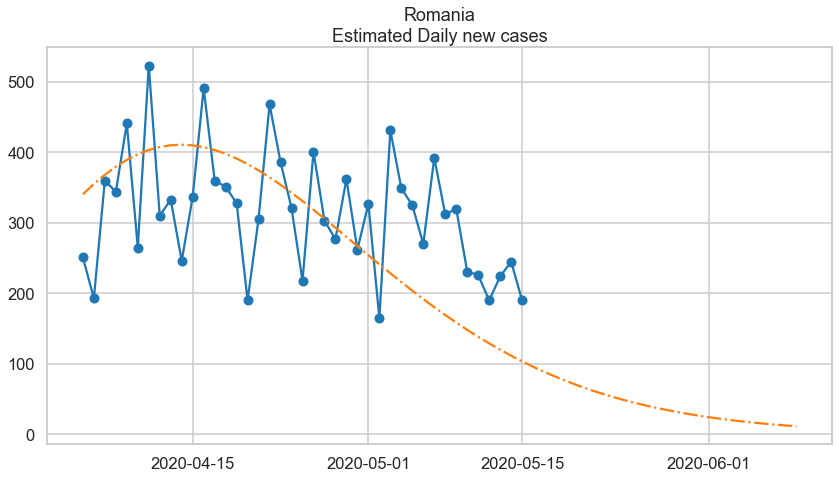

In [4]:
ro.display(offset=42)

## Commentary
### 14th April
The low cases is good for the country, but makes it tricky to fit.

To compare I've used a combination of Australia and Sweden. Romania has a greater percentage of rural population, which helps stop the spread. Romania also went it to look down early in its spread. I think that puts it closer to Australia in terms of number of cases - but because Romania is land neighbours with European countries - I think the duration is naturally longer as people could move across the border.

I seeded with Australian duration and peak, but let the duration grow to get the best fit. It is possible that the peak is further out and not as shown in this fit. The next 7 days should make that clear.